In [12]:
!pip install qiskit qiskit_aer
!pip install pylatexenc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=e705efdeb98f859ab3938e9f4ce74af3ac6cbec984a2faadf371e29852117a26
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [13]:
# Grover's Search Algorithm using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, depolarizing_error
import matplotlib.pyplot as plt

In [14]:
def oracle(qc, n, marked_state):
    """Constructs the oracle that marks the desired state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # Multi-controlled X gate
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)


In [18]:
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))


def grover_search(marked_state, iterations=1):
    """Builds Grover's search circuit for a given marked state with specified iterations."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))  # Step 1: Initialize in superposition

    # Step 2: Apply oracle + diffuser multiple times
    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)

    qc.measure(range(n), range(n))  # Step 3: Measurement
    return qc


def run_grover(qc, noise_model=None):
    """Runs Grover's algorithm and displays results."""
    simulator = AerSimulator(noise_model=noise_model)
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()
    return counts

def create_noise_model():
    """Creates a simple depolarizing noise model."""
    noise_model = NoiseModel()
    error_1 = depolarizing_error(0.01, 1)
    error_2 = depolarizing_error(0.02, 2)
    noise_model.add_all_qubit_quantum_error(error_1, ['x', 'h'])
    noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
    return noise_model



🔍 Searching for marked state: 101
⚙ Using 3 qubits and 2 iteration(s)

🧩 Grover Circuit:


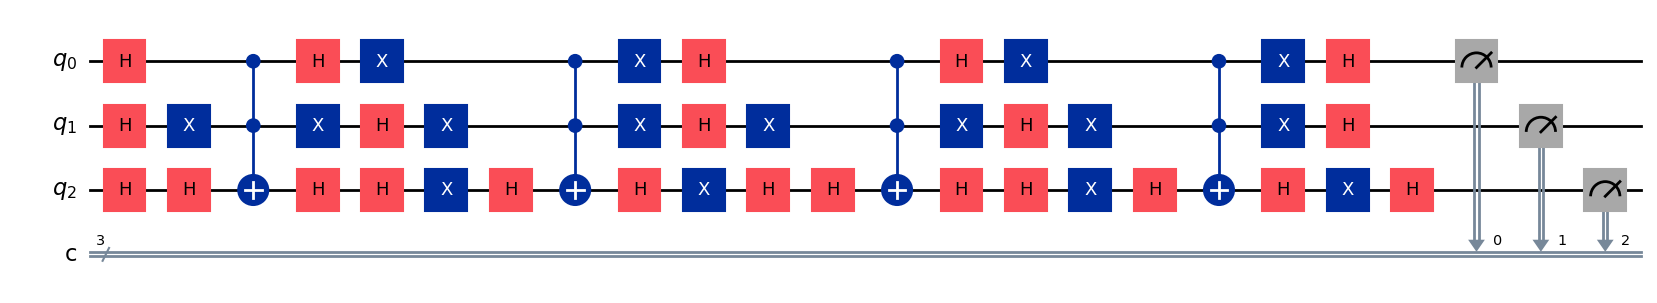

🎯 Running ideal simulation...
Result (Ideal): {'110': 4, '010': 13, '000': 4, '011': 12, '111': 8, '001': 11, '100': 7, '101': 965} 

🌫 Running simulation with noise model...
Result (With Noise): {'110': 61, '000': 61, '010': 35, '100': 83, '011': 46, '111': 69, '001': 67, '101': 602} 

💡 Skipping real hardware run (not configured). No module named 'qiskit_ibm_runtime'

✅ Grover’s Algorithm Execution Complete!


In [27]:
if __name__ == "__main__":

    marked_state = "101"
    iterations = 2

    print("🔍 Searching for marked state:", marked_state)
    print("⚙ Using", len(marked_state), "qubits and", iterations, "iteration(s)\n")

    qc = grover_search(marked_state, iterations)

    print("🧩 Grover Circuit:")
    display(qc.draw('mpl'))

    print("🎯 Running ideal simulation...")
    ideal_counts = run_grover(qc)
    print("Result (Ideal):", ideal_counts, "\n")

    print("🌫 Running simulation with noise model...")
    noisy_counts = run_grover(qc, noise_model=create_noise_model())
    print("Result (With Noise):", noisy_counts, "\n")

    try:
        from qiskit_ibm_runtime import QiskitRuntimeService
        service = QiskitRuntimeService()
        backend = service.least_busy(simulator=False)
        print(f"🧠 Running on real backend: {backend.name}")
        job = backend.run(qc, shots=1024)
        result = job.result()
        counts_hw = result.get_counts()
        plot_histogram(counts_hw)
        plt.show()
    except Exception as e:
        print("💡 Skipping real hardware run (not configured).", e)

    print("\n✅ Grover’s Algorithm Execution Complete!")